# MACHINE LEARNING PROJECT: MOVIE SUCCESS PREDICTION

# DATA LOADING

In [152]:
import pandas as pd

df = pd.read_csv('/Users/ayyalashriyatha/Desktop/movie_success_rate.csv')
df

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,...,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,Success
0,1.0,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014.0,121.0,8.10000,757074.0000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,2.0,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012.0,124.0,7.00000,485820.0000,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,3.0,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016.0,117.0,7.30000,157606.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,4.0,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016.0,108.0,7.20000,60545.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016.0,123.0,6.20000,393727.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
834,995.0,Project X,Comedy,3 high school seniors throw a birthday party t...,Nima Nourizadeh,"Thomas Mann, Oliver Cooper, Jonathan Daniel Br...",2012.0,88.0,6.70000,164088.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
835,997.0,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007.0,94.0,5.50000,73152.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
836,998.0,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008.0,98.0,6.20000,70699.0000,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
837,1000.0,Nine Lives,"Comedy,Family,Fantasy",A stuffy businessman finds himself trapped ins...,Barry Sonnenfeld,"Kevin Spacey, Jennifer Garner, Robbie Amell,Ch...",2016.0,87.0,5.30000,12435.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839 entries, 0 to 838
Data columns (total 33 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                838 non-null    float64
 1   Title               838 non-null    object 
 2   Genre               838 non-null    object 
 3   Description         838 non-null    object 
 4   Director            838 non-null    object 
 5   Actors              838 non-null    object 
 6   Year                838 non-null    float64
 7   Runtime (Minutes)   838 non-null    float64
 8   Rating              839 non-null    float64
 9   Votes               839 non-null    float64
 10  Revenue (Millions)  839 non-null    float64
 11  Metascore           838 non-null    float64
 12  Action              838 non-null    float64
 13  Adventure           838 non-null    float64
 14  Aniimation          838 non-null    float64
 15  Biography           838 non-null    float64
 16  Comedy  

# DATA CLEANING AND PREPROCEESING

# 1. Handle Missing Data

In [154]:
df.isnull().sum()

Rank                  1
Title                 1
Genre                 1
Description           1
Director              1
Actors                1
Year                  1
Runtime (Minutes)     1
Rating                0
Votes                 0
Revenue (Millions)    0
Metascore             1
Action                1
Adventure             1
Aniimation            1
Biography             1
Comedy                1
Crime                 1
Drama                 1
Family                1
Fantasy               1
History               1
Horror                1
Music                 1
Musical               1
Mystery               1
Romance               1
Sci-Fi                1
Sport                 1
Thriller              1
War                   1
Western               1
Success               1
dtype: int64

In [155]:
# Median fill for numerical columns
df['Rank'] = df['Rank'].fillna(df['Rank'].median())
df['Year'] = df['Year'].fillna(df['Year'].median())
df['Runtime (Minutes)'] = df['Runtime (Minutes)'].fillna(df['Runtime (Minutes)'].median())
df['Rating'] = df['Rating'].fillna(df['Rating'].mean())  # Use mean for a normally distributed column
df['Votes'] = df['Votes'].fillna(df['Votes'].median())
df['Revenue (Millions)'] = df['Revenue (Millions)'].fillna(df['Revenue (Millions)'].median())
df['Metascore'] = df['Metascore'].fillna(df['Metascore'].median())

# Mode fill for categorical columns
df['Genre'] = df['Genre'].fillna(df['Genre'].mode()[0])
df['Director'] = df['Director'].fillna(df['Director'].mode()[0])
df['Actors'] = df['Actors'].fillna(df['Actors'].mode()[0])

genre_columns = ['Action', 'Adventure', 'Aniimation', 'Biography', 'Comedy', 'Crime', 'Drama', 'Family', 
                 'Fantasy', 'History', 'Horror', 'Music', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 
                 'Sport', 'Thriller', 'War', 'Western']
df[genre_columns] = df[genre_columns].fillna(0)
# Fill `Success` with 0 (assuming 0 indicates a default value for "unknown" or "not successful")
df['Success'] = df['Success'].fillna(0)
# Fill text-based columns with 'Unknown'
df[['Title', 'Description']] = df[['Title', 'Description']].fillna("Unknown")

In [157]:
df.isnull().sum()

Rank                  0
Title                 0
Genre                 0
Description           0
Director              0
Actors                0
Year                  0
Runtime (Minutes)     0
Rating                0
Votes                 0
Revenue (Millions)    0
Metascore             0
Action                0
Adventure             0
Aniimation            0
Biography             0
Comedy                0
Crime                 0
Drama                 0
Family                0
Fantasy               0
History               0
Horror                0
Music                 0
Musical               0
Mystery               0
Romance               0
Sci-Fi                0
Sport                 0
Thriller              0
War                   0
Western               0
Success               0
dtype: int64

In [156]:
df = df.drop_duplicates()

# 2. HANDLING OUTLIERS

# Since my dataset has only 839 rows removing oultiers will reduce significant amount of data. So here we use capping to handle outliers

In [158]:
import numpy as np

# Capping outliers based on IQR for numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
numerical_columns.remove('Success')  # Remove 'Success' from the list

for column in numerical_columns:
    # Calculate Q1, Q3, and IQR for the column
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Calculate the lower and upper bounds for outlier capping
    lower_cap = Q1 - 1.5 * IQR
    upper_cap = Q3 + 1.5 * IQR
    
    # Apply capping to the column
    df[column] = np.where(df[column] < lower_cap, lower_cap, df[column])
    df[column] = np.where(df[column] > upper_cap, upper_cap, df[column])

# Show summary after capping outliers
print("\nSummary of data after capping outliers:")
print(df[numerical_columns].describe())



Summary of data after capping outliers:
              Rank         Year  Runtime (Minutes)      Rating          Votes  \
count   839.000000   839.000000         839.000000  839.000000     839.000000   
mean    485.235399  2012.507747         114.403456    6.822901  184424.403161   
std     286.401226     3.170512          17.803561    0.846317  158615.507784   
min       1.000000  2006.000000          66.500000    4.500000     178.000000   
25%     238.500000  2010.000000         101.000000    6.300000   61455.000000   
50%     475.500000  2013.000000         112.000000    6.900000  137117.000000   
75%     729.500000  2015.000000         124.000000    7.500000  270865.000000   
max    1000.000000  2016.000000         158.500000    9.000000  584980.000000   

       Revenue (Millions)   Metascore      Action   Adventure  Aniimation  \
count          839.000000  839.000000  839.000000  839.000000       839.0   
mean            77.474323   59.575685    0.330155    0.290822         0.0  

# EXPLORATORY DATA ANALYSIS (EDA)

# 1. Distribution of Numerical Features

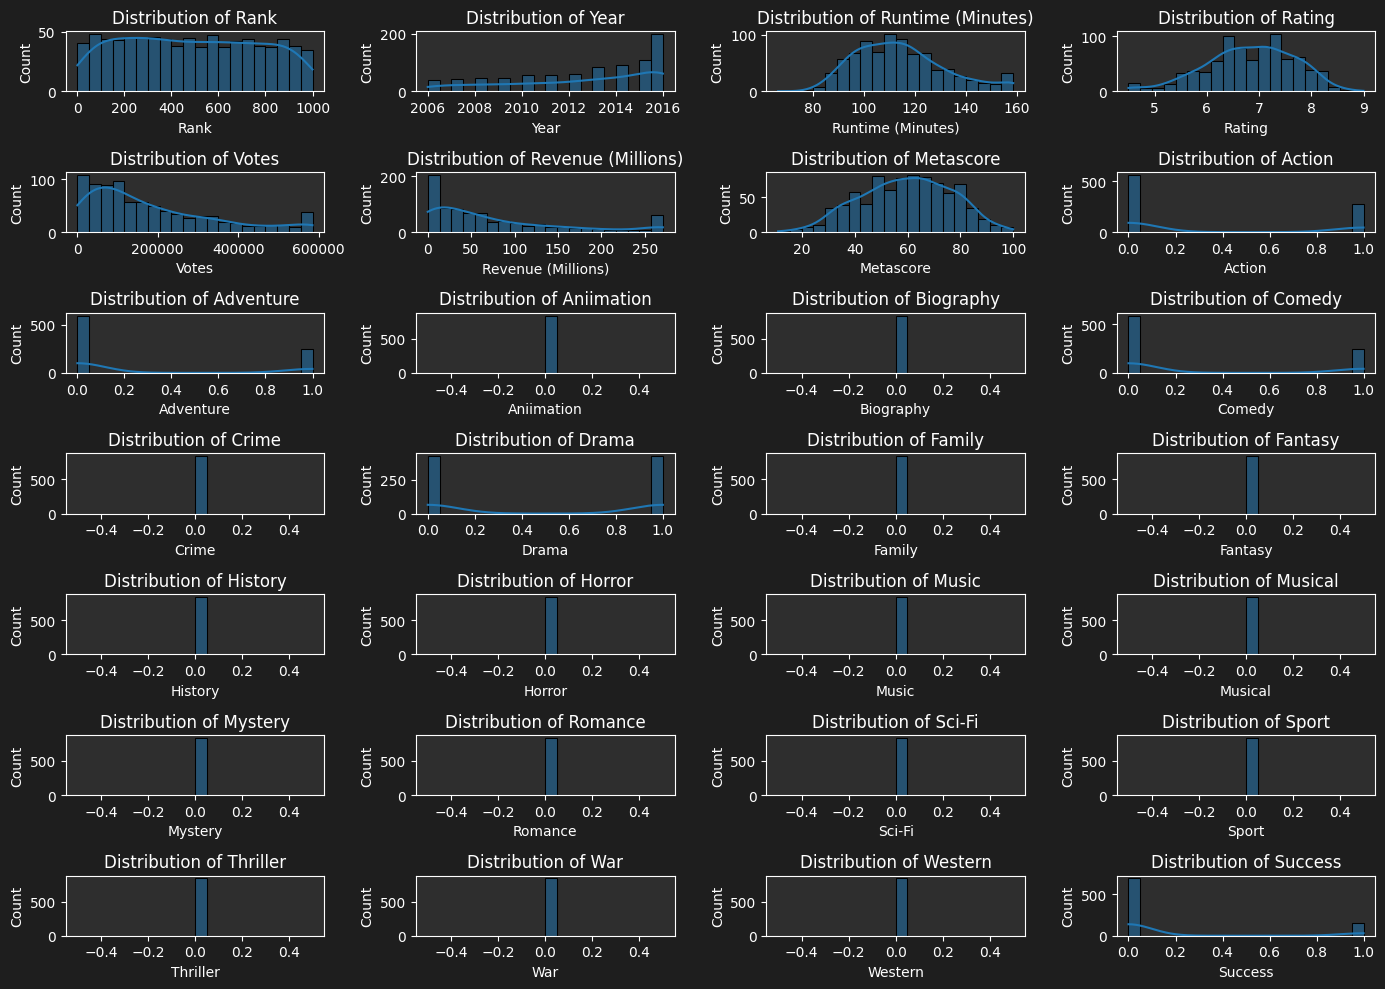

In [159]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical columns for correlation
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Set the number of rows and columns for the grid based on the number of numerical columns
num_columns = len(numerical_columns)
num_rows = (num_columns // 4) + (1 if num_columns % 4 != 0 else 0)  # Calculate rows needed

# Plotting histograms for numerical columns
plt.figure(figsize=(14, 10))
for i, column in enumerate(numerical_columns):
    plt.subplot(num_rows, 4, i + 1)  # Dynamic grid size (4 columns per row)
    sns.histplot(df[column], kde=True, bins=20)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

<Figure size 1400x1000 with 0 Axes>

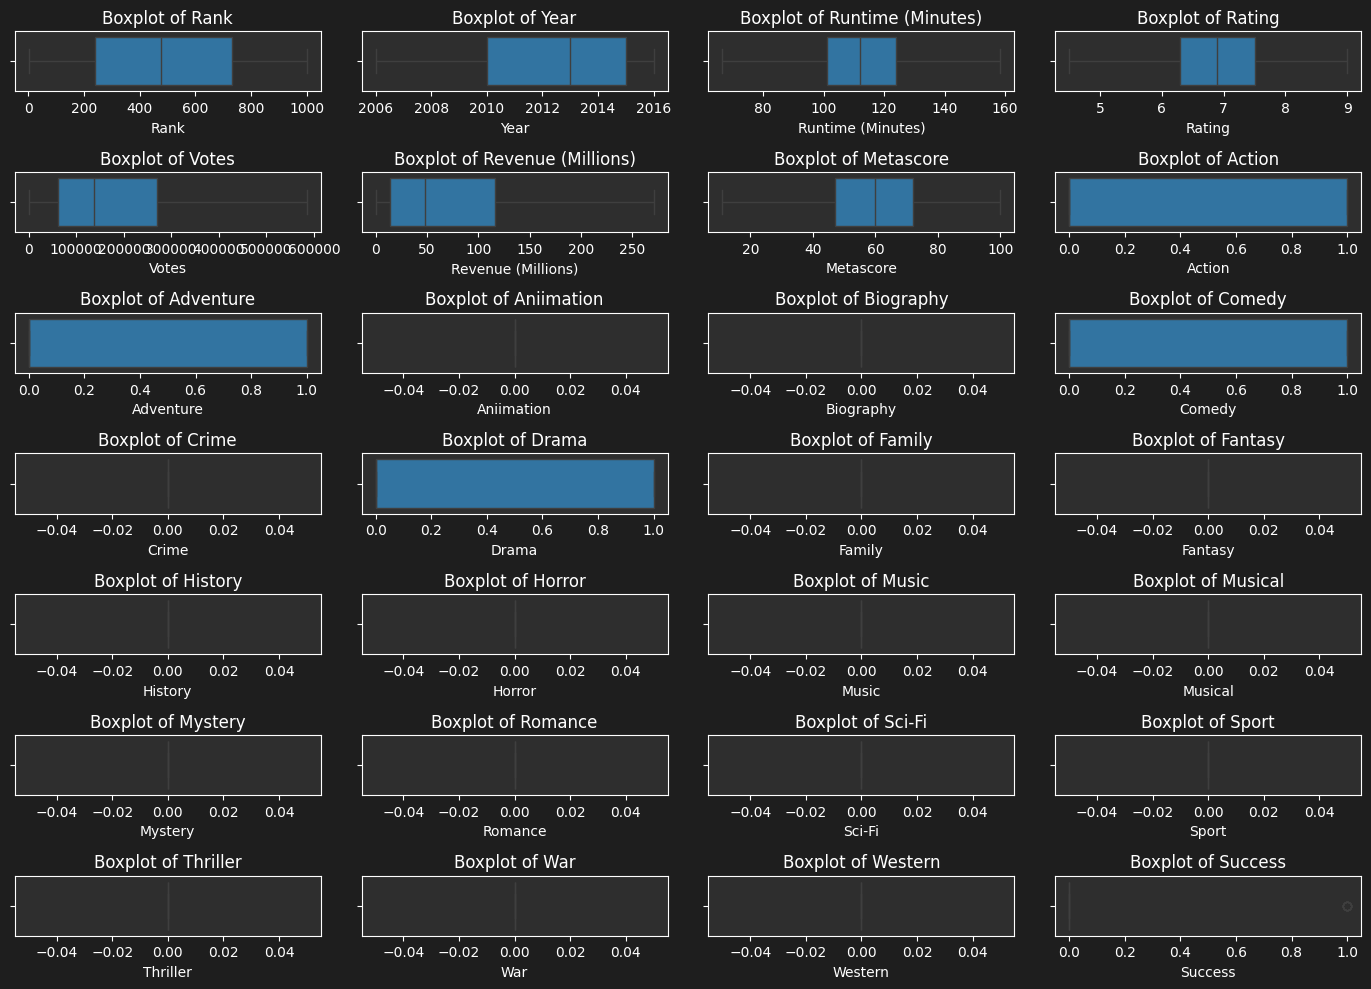

In [160]:
plt.figure(figsize=(14, 10))

num_columns = len(numerical_columns)
num_rows = (num_columns // 4) + (1 if num_columns % 4 != 0 else 0) 

# Plotting histograms for numerical columns
plt.figure(figsize=(14, 10))

for i, column in enumerate(numerical_columns):
    plt.subplot(num_rows, 4, i + 1)  # Dynamic grid size (4 columns per row)
    sns.boxplot(data=df, x=column)
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

# 3. Relationships between features

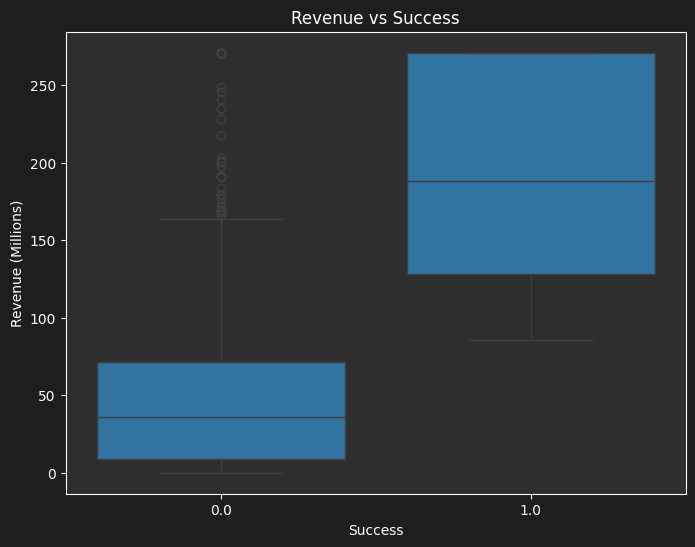

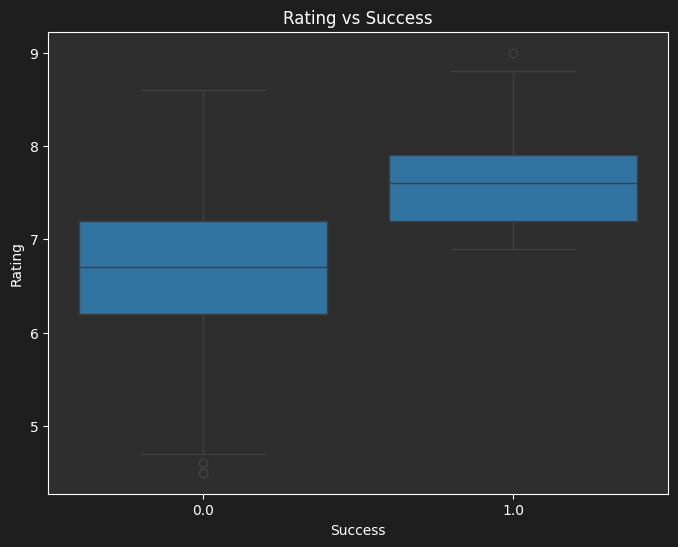

In [161]:
# Plot Revenue vs Success
plt.figure(figsize=(8, 6))
sns.boxplot(x='Success', y='Revenue (Millions)', data=df)
plt.title('Revenue vs Success')
plt.show()

# Plot Rating vs Success
plt.figure(figsize=(8, 6))
sns.boxplot(x='Success', y='Rating', data=df)
plt.title('Rating vs Success')
plt.show()


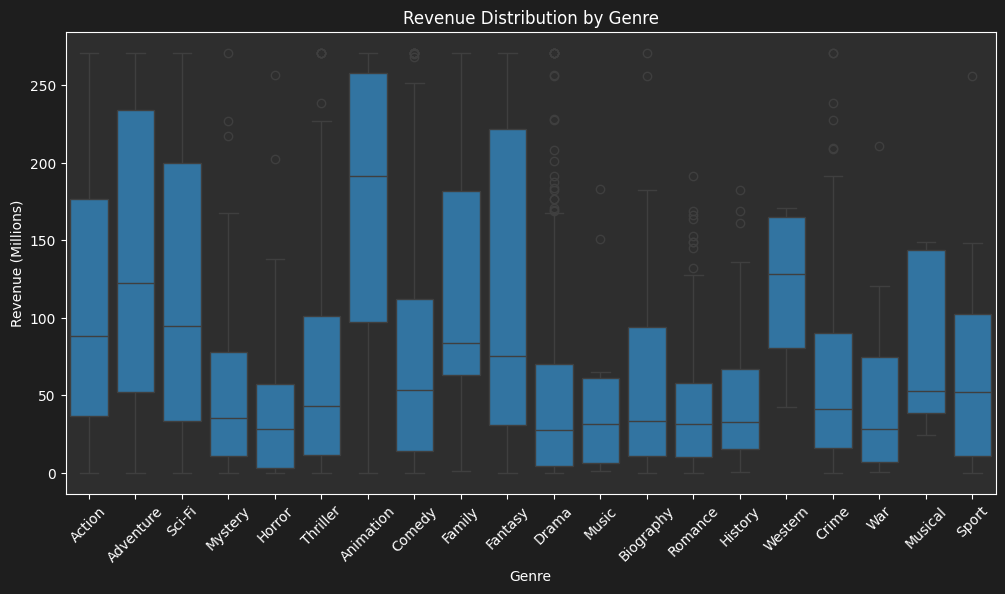

In [162]:
# Boxplot for revenue by genre
df['Genre'] = df['Genre'].str.split(',')
df = df.explode('Genre')

plt.figure(figsize=(12, 6))
sns.boxplot(x='Genre', y='Revenue (Millions)', data=df)
plt.title('Revenue Distribution by Genre')
plt.xticks(rotation=45)
plt.show()

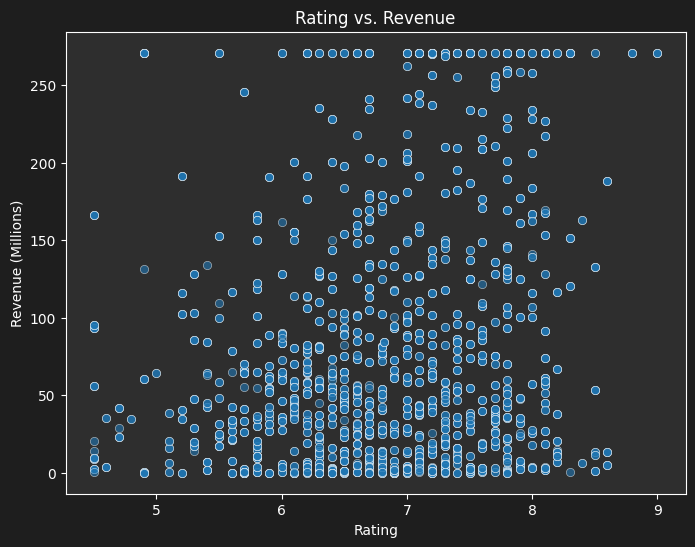

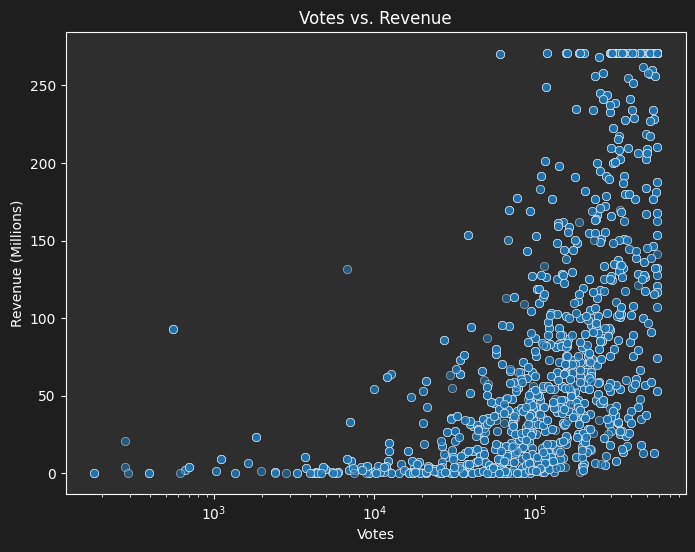

In [163]:
# Scatter plot of Rating vs. Revenue
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Rating', y='Revenue (Millions)', data=df, alpha=0.6)
plt.title('Rating vs. Revenue')
plt.xlabel('Rating')
plt.ylabel('Revenue (Millions)')
plt.show()

# Scatter plot of Votes vs. Revenue
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Votes', y='Revenue (Millions)', data=df, alpha=0.6)
plt.title('Votes vs. Revenue')
plt.xlabel('Votes')
plt.ylabel('Revenue (Millions)')
plt.xscale('log')  # Log scale for better visibility
plt.show()

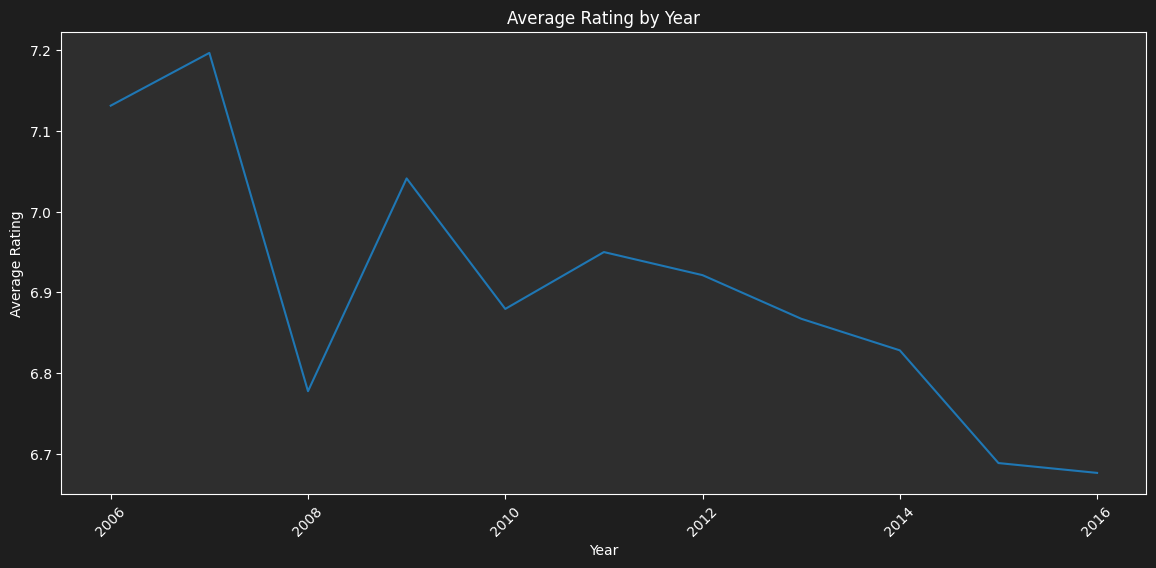

In [164]:
# Average Rating by Year
avg_rating_by_year = df.groupby('Year')['Rating'].mean().reset_index()
plt.figure(figsize=(14, 6))
sns.lineplot(x='Year', y='Rating', data=avg_rating_by_year)
plt.title('Average Rating by Year')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()

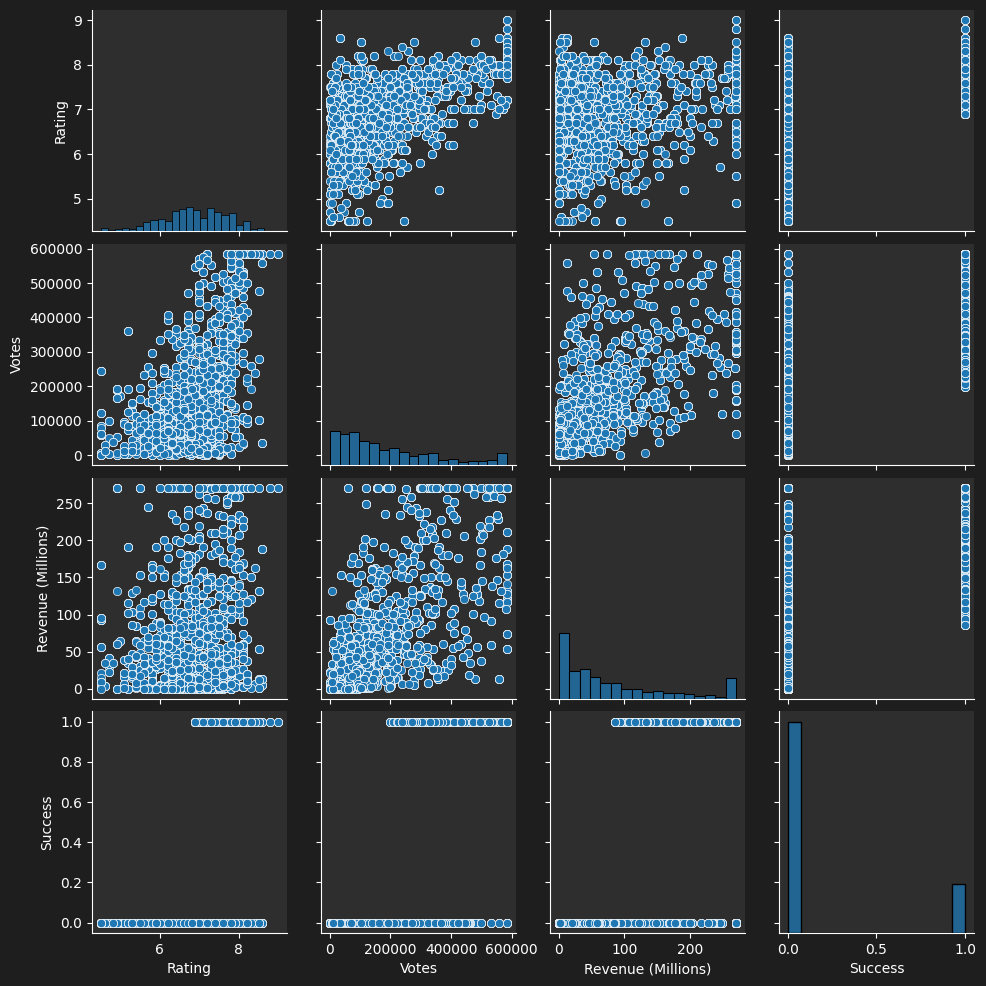

In [165]:
import seaborn as sns

# Pair plot for key features
sns.pairplot(df[['Rating', 'Votes', 'Revenue (Millions)', 'Success']])
plt.show()

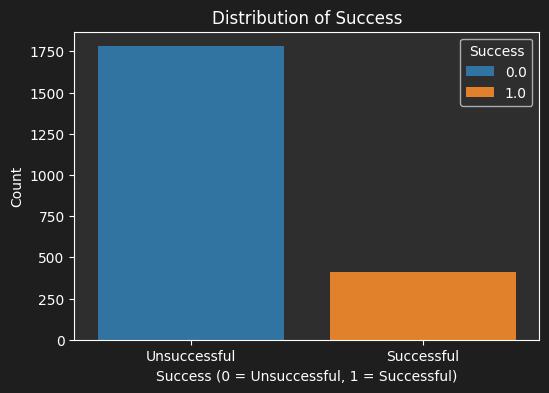

In [166]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Success', hue='Success')
plt.title('Distribution of Success')
plt.xlabel('Success (0 = Unsuccessful, 1 = Successful)')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Unsuccessful', 'Successful'])
plt.show()

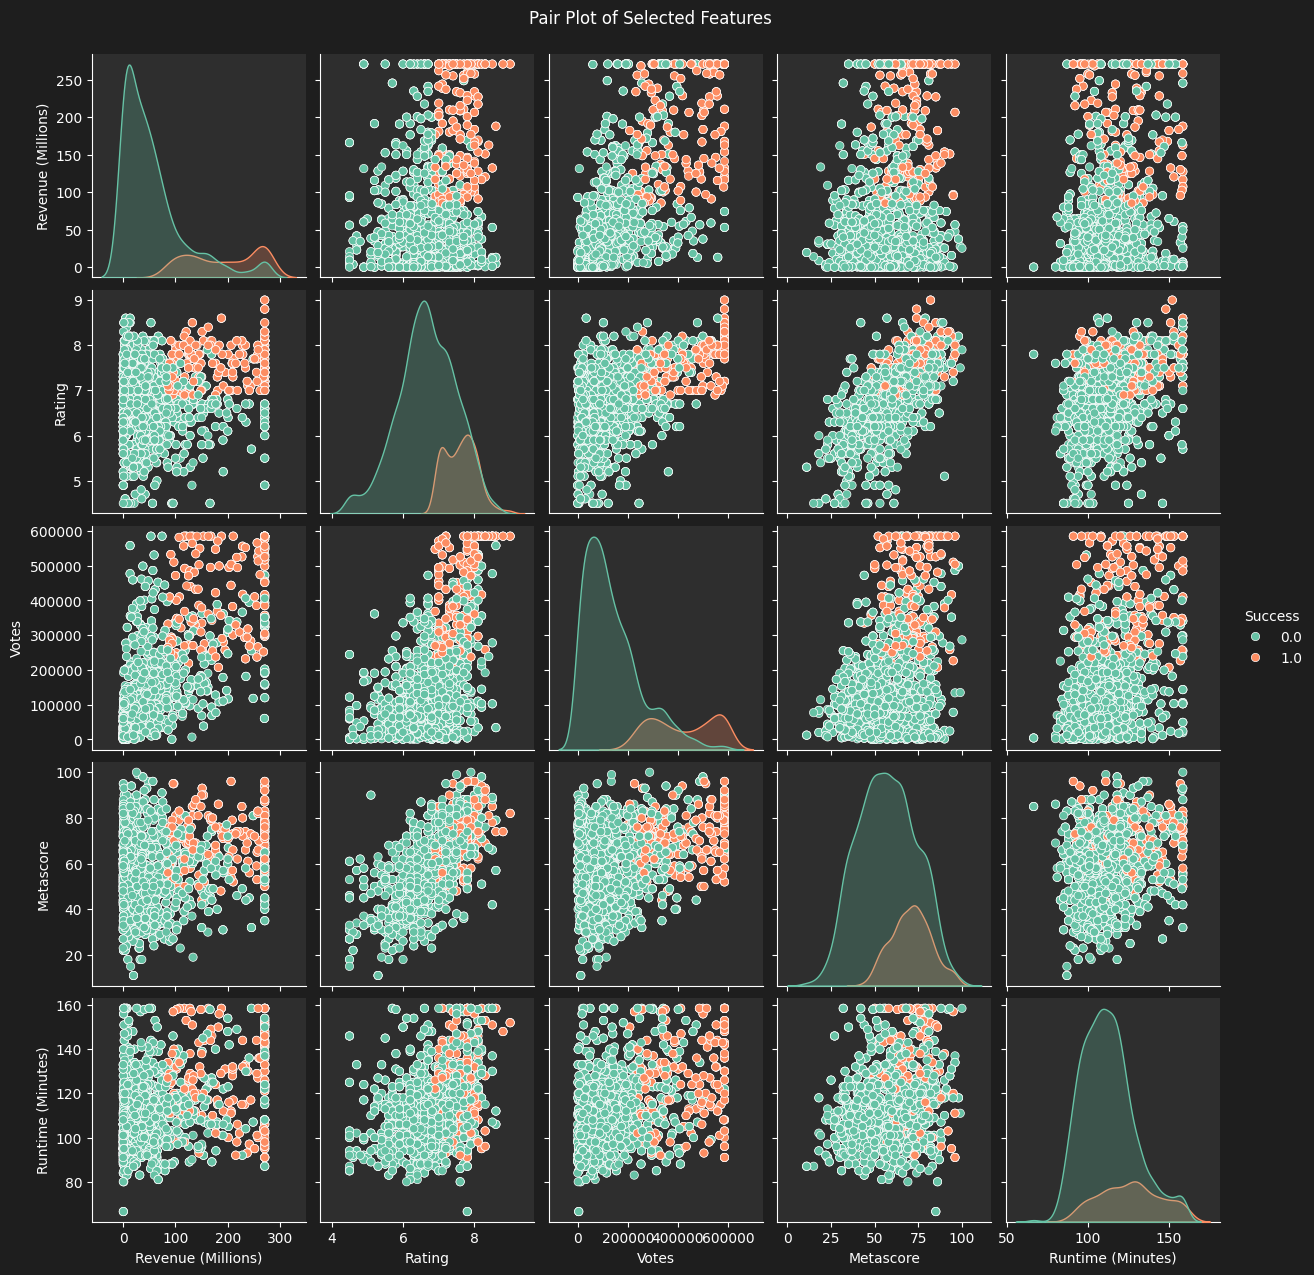

In [167]:
numerical_features = ['Revenue (Millions)', 'Rating', 'Votes', 'Metascore', 'Runtime (Minutes)']
sns.pairplot(df, vars=numerical_features, hue='Success', palette='Set2', diag_kind='kde')
plt.suptitle('Pair Plot of Selected Features', y=1.02)
plt.show()

# Categorical Feature Analysis

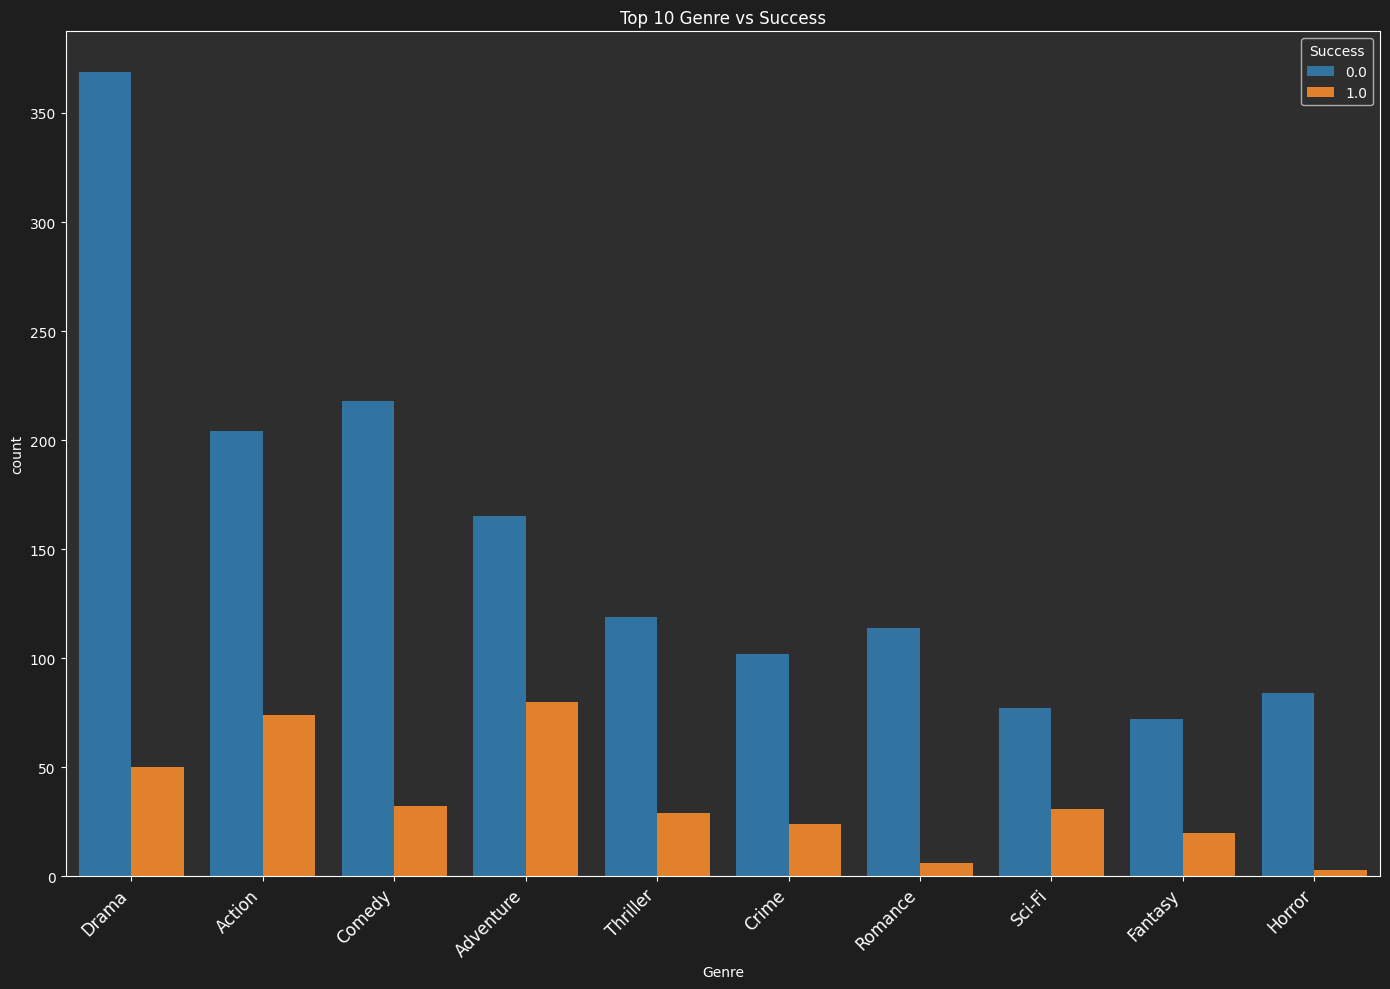

In [168]:
import seaborn as sns
import matplotlib.pyplot as plt

top_n_genres = df['Genre'].value_counts().head(10).index

# Plot Genre vs Success for top N genres
plt.figure(figsize=(14, 10))  # Increase figure size for better spacing
sns.countplot(data=df[df['Genre'].isin(top_n_genres)], x='Genre', hue='Success', order=top_n_genres)

# Title for the plot
plt.title('Top 10 Genre vs Success')

# Rotate x-axis labels and adjust positioning for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)  # Adjust angle, alignment, and font size

# Adjust layout to ensure that labels fit well
plt.tight_layout()

plt.show()

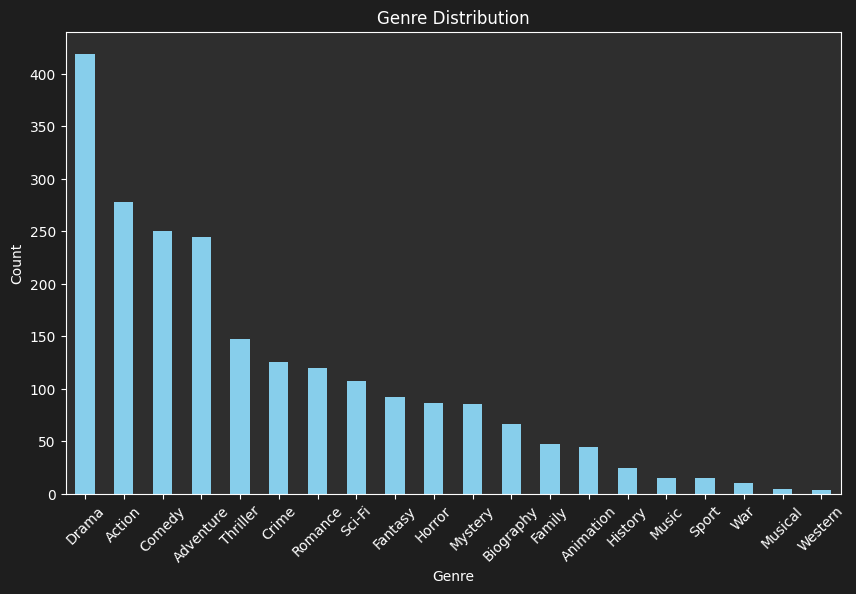

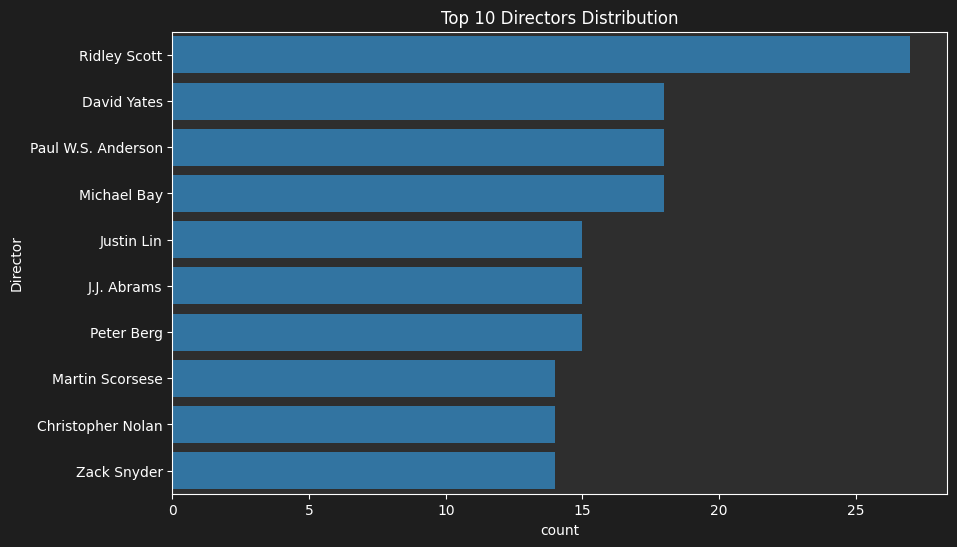

In [169]:
import matplotlib.pyplot as plt
import seaborn as sns

# Handle multiple genres in 'Genre' column
genre_counts = df['Genre'].str.split(',').explode().str.strip().value_counts()

# Plotting the genre distribution
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar', color='skyblue')
plt.title('Genre Distribution')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Remove NaN values from Director column and get top 10 directors
top_directors = df['Director'].dropna().value_counts().head(10)

# Plotting the top 10 directors
plt.figure(figsize=(10, 6))
sns.countplot(y='Director', data=df[df['Director'].isin(top_directors.index)], order=top_directors.index)
plt.title('Top 10 Directors Distribution')
plt.show()

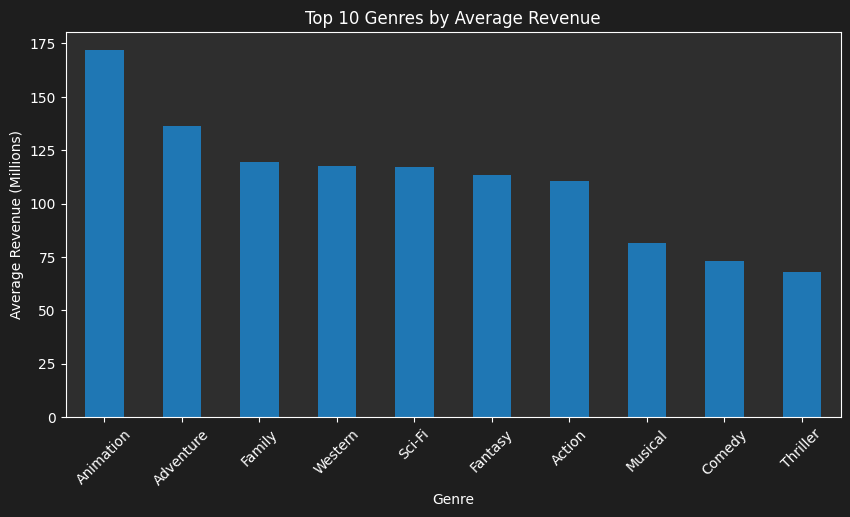

In [170]:
# Calculate the average revenue by genre and sort in descending order
genre_revenue = df.groupby('Genre')['Revenue (Millions)'].mean().sort_values(ascending=False)

# Select only the top 10 genres
top_10_genre_revenue = genre_revenue.head(10)

# Plot the bar chart for the top 10 genres
top_10_genre_revenue.plot(kind='bar', figsize=(10, 5))
plt.title('Top 10 Genres by Average Revenue')
plt.ylabel('Average Revenue (Millions)')
plt.xticks(rotation=45)
plt.show()

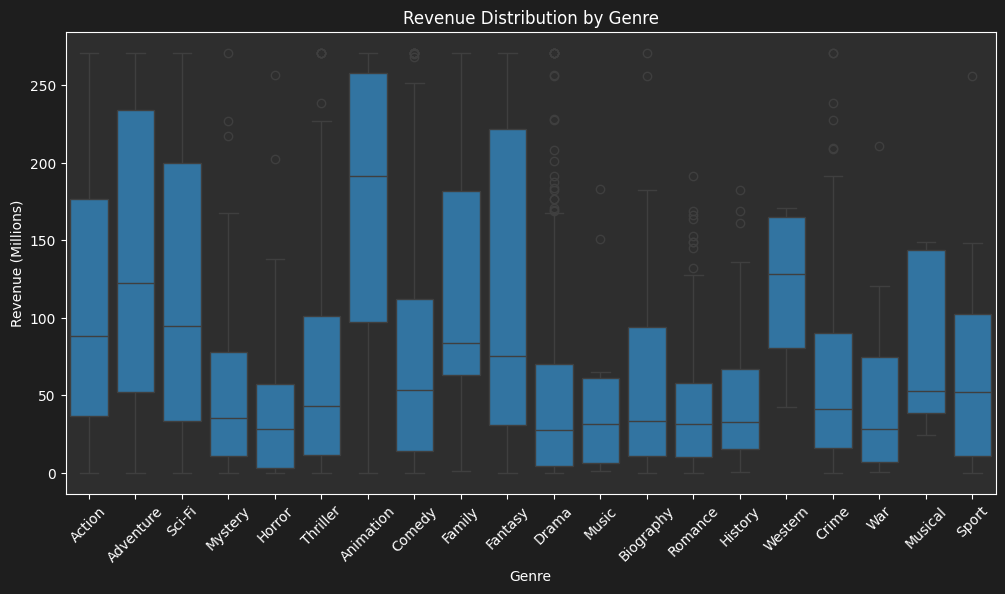

In [171]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Genre', y='Revenue (Millions)', data=df)
plt.title('Revenue Distribution by Genre')
plt.xticks(rotation=45)
plt.show()

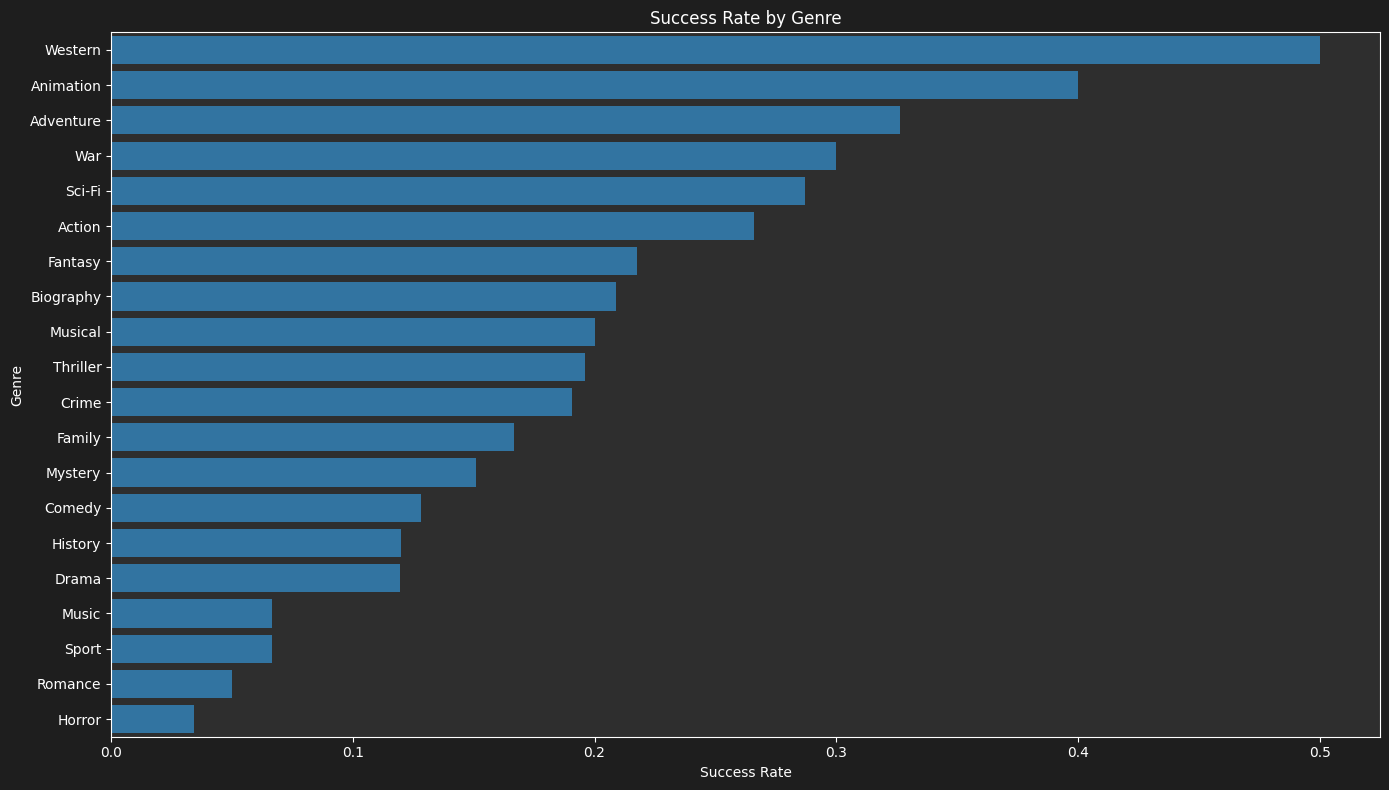

In [172]:
# Group by genre and calculate mean success rate and standard deviation
success_by_genre = df.groupby('Genre')['Success'].agg(['mean', 'std', 'count']).reset_index()

# Plotting the success rate by genre with error bars
plt.figure(figsize=(14, 8))
sns.barplot(x='mean', y='Genre', data=success_by_genre.sort_values('mean', ascending=False),
            errorbar='sd')  # Using Seaborn's built-in confidence interval, which defaults to standard deviation
plt.title('Success Rate by Genre')
plt.xlabel('Success Rate')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()

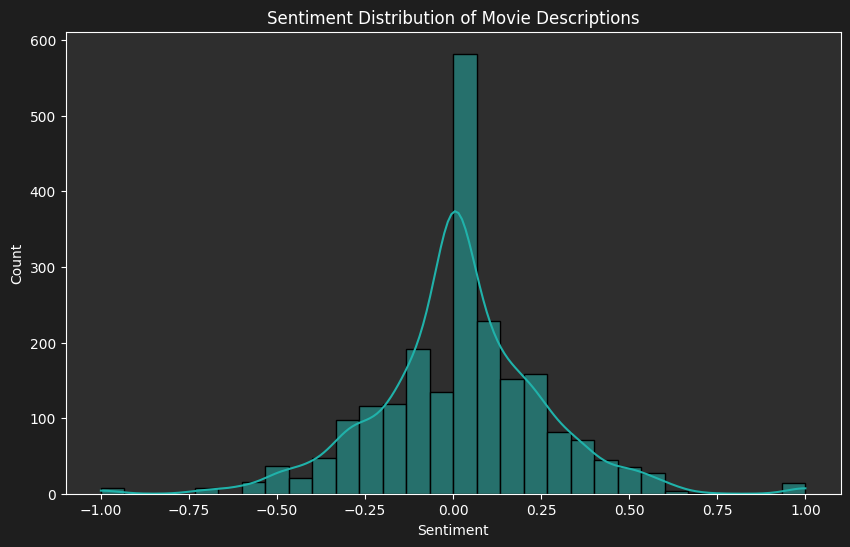

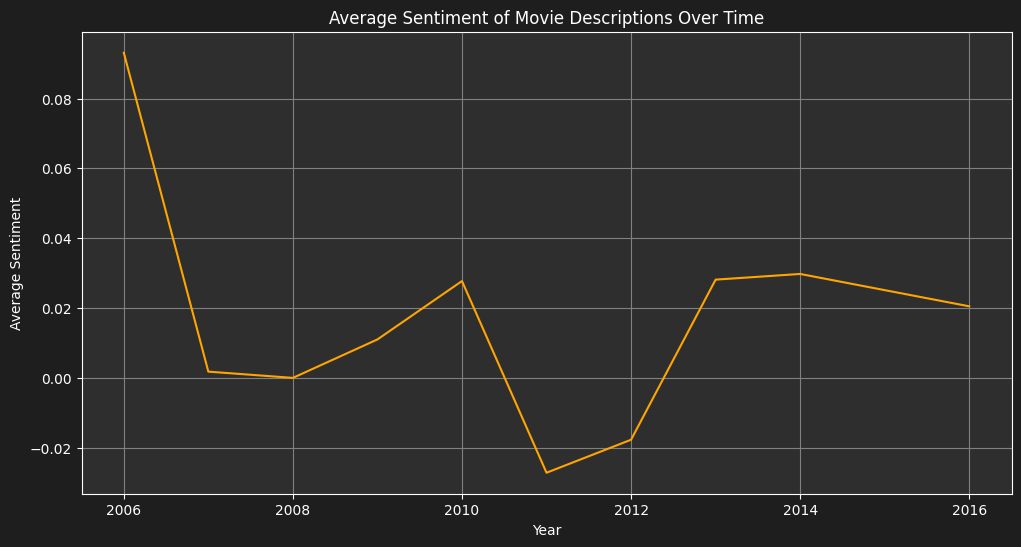

In [173]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob

#The function get_sentiment uses TextBlob to extract the sentiment polarity (a value between -1 and 1, where -1 is very negative, 0 is neutral, and 1 is very positive).
df['Description'] = df['Description'].fillna('')

# Function to calculate sentiment polarity
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Apply sentiment analysis
df['Sentiment'] = df['Description'].apply(lambda x: get_sentiment(str(x)))

# Visualize the sentiment distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Sentiment'], kde=True, color='lightseagreen', bins=30)
plt.title('Sentiment Distribution of Movie Descriptions')
plt.show()

# Sentiment by release year

sentiment_by_year = df.groupby('Year')['Sentiment'].mean()

# Plot sentiment by year
plt.figure(figsize=(12, 6))
sentiment_by_year.plot(kind='line', color='orange')
plt.title('Average Sentiment of Movie Descriptions Over Time')
plt.xlabel('Year')
plt.ylabel('Average Sentiment')
plt.grid(True)
plt.show()


# FEATURE ENGINEERING

In [174]:
df.rename(columns={'Aniimation': 'Animation'}, inplace=True)

In [175]:
director_revenue = df.groupby('Director')['Revenue (Millions)'].mean()  # Mean revenue per director
director_revenue = director_revenue.reset_index()
director_revenue.columns = ['Director', 'Avg_Revenue']  # Rename columns

# Merge back into the main dataframe
df = df.merge(director_revenue, on='Director', how='left')


In [176]:
from textblob import TextBlob

# Calculate sentiment polarity for each movie's description or review
df['Sentiment_Polarity'] = df['Description'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)


In [177]:
# Example of a budget-genre interaction feature
df['High_Budget_Action'] = df.apply(lambda row: 1 if row['Genre'] == 'Action' and row['Revenue (Millions)'] > 100 else 0, axis=1)

In [178]:
df['Success'] = df['Success'].astype(int)

In [179]:
# Initialize LabelEncoder
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Apply Label Encoding on categorical columns
df['Genre'] = label_encoder.fit_transform(df['Genre'])
df['Director'] = label_encoder.fit_transform(df['Director'])


In [180]:
# Example of binning revenue
bins = [0, 100, 500, 1000, np.inf]
labels = ['Low', 'Medium', 'High', 'Very High']
df['Revenue_Binned'] = pd.cut(df['Revenue (Millions)'], bins=bins, labels=labels)
bins = [0, 20000, 100000, 300000, 600000, np.inf]
labels = ['Low', 'Medium', 'High', 'Very High', 'Extremely High']
df['Votes_Binned'] = pd.cut(df['Votes'], bins=bins, labels=labels)
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Revenue_Binned'] = label_encoder.fit_transform(df['Revenue_Binned'])
df['Votes_Binned'] = label_encoder.fit_transform(df['Votes_Binned'])

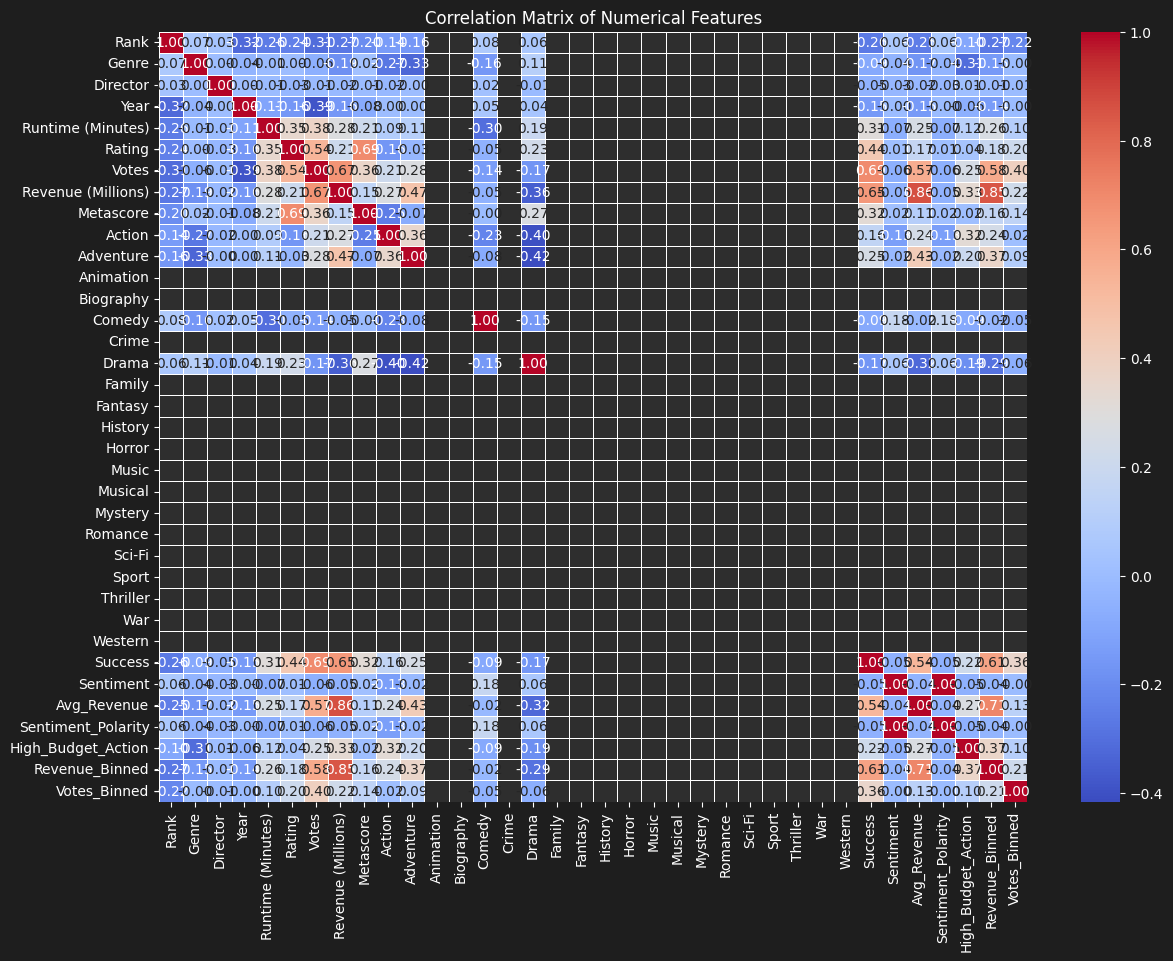

In [181]:
import seaborn as sns
import matplotlib.pyplot as plt
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Calculate the correlation matrix for numerical columns
correlation_matrix = df[numerical_columns].corr()

# Plot the correlation matrix
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()


# 5. Feature Selection and Engineering

In [212]:
# Calculate correlation between features and the target variable 'Success'
correlation_with_success = df[['Year', 'Runtime (Minutes)', 'Rating', 'Votes_Binned', 'Revenue_Binned', 
                               'Metascore', 'Action', 'Adventure', 'Comedy', 'Drama',
                               'Sentiment_Polarity', 'Success']].corr()
# This is beacause data leakage is occuring when we use votes and revenue.
# Extract correlation of each feature with 'Success'
correlation_with_success = correlation_with_success['Success'].drop('Success')  # Exclude 'Success' itself

# Select features with correlation greater than 0.15 or less than -0.15
selected_features = correlation_with_success[(correlation_with_success > 0.3) | (correlation_with_success < -0.3)].index.tolist()

# Print the selected features
print("Selected Features with correlation greater than 0.15 or less than -0.15 with 'Success':")
print(selected_features)


X = df[selected_features]
y = df['Success']


Selected Features with correlation greater than 0.15 or less than -0.15 with 'Success':
['Runtime (Minutes)', 'Rating', 'Votes_Binned', 'Revenue_Binned', 'Metascore']


In [213]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shape of the splits
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

Training set size: 1754 samples
Testing set size: 439 samples


In [214]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_1, y_train_1 = smote.fit_resample(X_train, y_train)

# Check the balance of the classes in the resampled training set
print(f"Original training set class distribution:\n{y_train.value_counts()}")
print(f"Resampled training set class distribution:\n{y_train_1.value_counts()}")

Original training set class distribution:
Success
0    1429
1     325
Name: count, dtype: int64
Resampled training set class distribution:
Success
0    1429
1    1429
Name: count, dtype: int64


# a) Simple Models: Logistic Regression

Accuracy: 0.8610
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.85      0.91       351
           1       0.60      0.92      0.73        88

    accuracy                           0.86       439
   macro avg       0.79      0.88      0.82       439
weighted avg       0.90      0.86      0.87       439



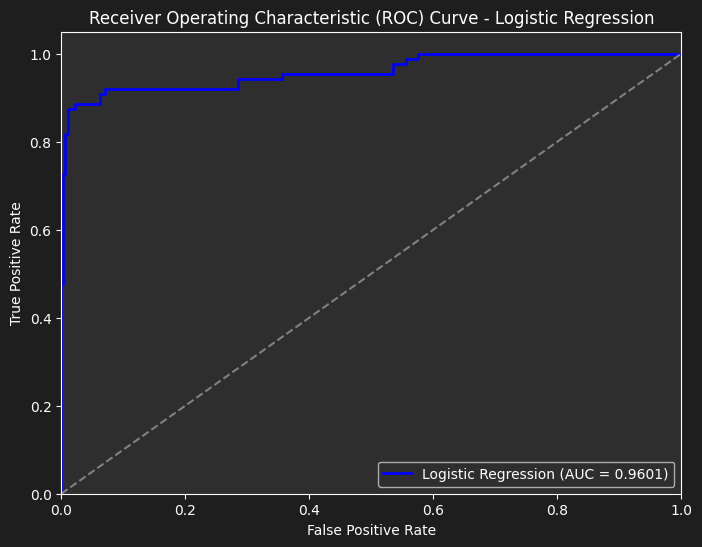

In [215]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize and train Logistic Regression model
log_reg_model = LogisticRegression(random_state=42, solver='liblinear', max_iter=500)
log_reg_model.fit(X_train_1, y_train_1)

# Make predictions
y_pred_log_reg = log_reg_model.predict(X_test)
y_pred_log_reg_prob = log_reg_model.predict_proba(X_test)[:, 1]

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred_log_reg):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_log_reg))

# Calculate ROC curve and AUC-ROC
fpr_log_reg, tpr_log_reg, _ = roc_curve(y_test, y_pred_log_reg_prob)
roc_auc_log_reg = auc(fpr_log_reg, tpr_log_reg)

# Plot ROC Curve for Logistic Regression
plt.figure(figsize=(8, 6))
plt.plot(fpr_log_reg, tpr_log_reg, color='blue', lw=2, label=f'Logistic Regression (AUC = {roc_auc_log_reg:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for random model
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Logistic Regression')
plt.legend(loc="lower right")
plt.show()


# Decision Tree

Accuracy: 0.9499
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       351
           1       0.84      0.92      0.88        88

    accuracy                           0.95       439
   macro avg       0.91      0.94      0.92       439
weighted avg       0.95      0.95      0.95       439



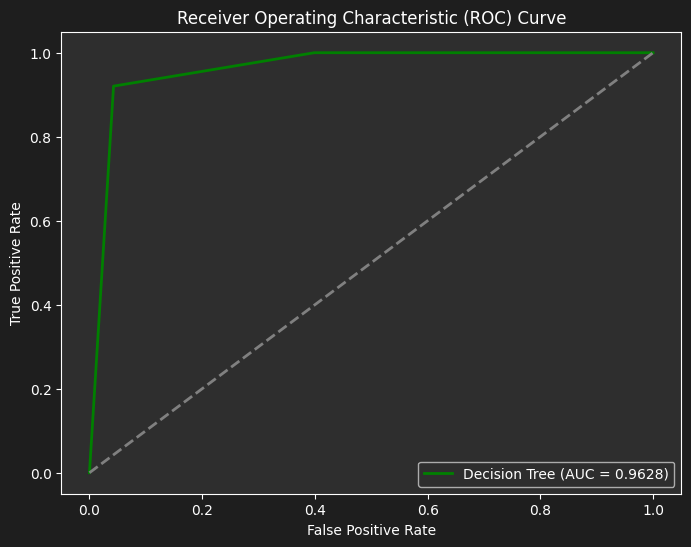

In [216]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, roc_auc_score, auc, accuracy_score, classification_report
import matplotlib.pyplot as plt

# Train Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42, max_depth=2, min_samples_split=2)
dt_model.fit(X_train_1, y_train_1)

# Get predictions and probabilities for ROC curve
y_pred_dt = dt_model.predict(X_test)  # Predicted labels
y_prob_dt = dt_model.predict_proba(X_test)[:, 1]  # Probabilities for ROC curve

# Calculate accuracy and classification report
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_dt))

# Calculate ROC curve and AUC
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

# Plot ROC Curve for Decision Tree
plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, color='green', lw=2, label=f'Decision Tree (AUC = {roc_auc_dt:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


# Naive Bayes

Accuracy: 0.9134
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.91      0.94       351
           1       0.72      0.92      0.81        88

    accuracy                           0.91       439
   macro avg       0.85      0.92      0.88       439
weighted avg       0.93      0.91      0.92       439



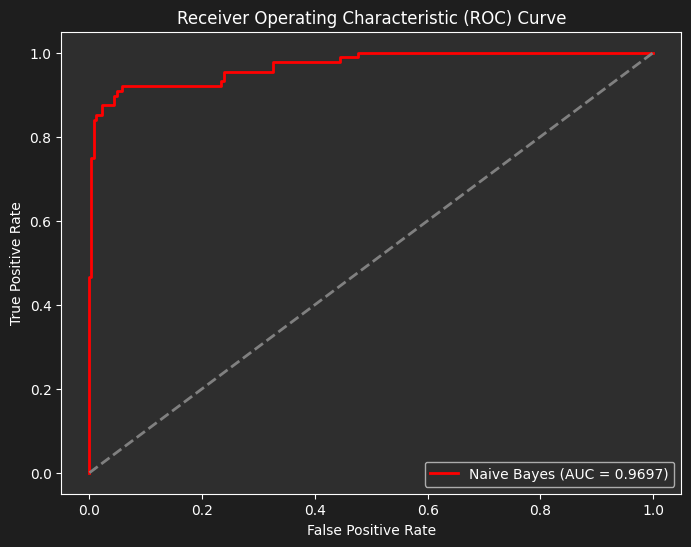

In [217]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, roc_auc_score, auc, accuracy_score, classification_report
import matplotlib.pyplot as plt

# Train Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train_1, y_train_1)

# Get predicted class labels for accuracy and classification report
y_pred_nb = nb_model.predict(X_test)  # Predicted class labels
y_prob_nb = nb_model.predict_proba(X_test)[:, 1]  # Probabilities for ROC curve

# Calculate accuracy and classification report
print(f"Accuracy: {accuracy_score(y_test, y_pred_nb):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_nb))

# Calculate ROC curve and AUC
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_prob_nb)
roc_auc_nb = auc(fpr_nb, tpr_nb)

# Plot ROC Curve for Naive Bayes
plt.figure(figsize=(8, 6))
plt.plot(fpr_nb, tpr_nb, color='red', lw=2, label=f'Naive Bayes (AUC = {roc_auc_nb:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


# b) Tree-Based Models: Random Forest

In [218]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train Random Forest classifier
rf_model = RandomForestClassifier(max_depth=4, random_state=42, n_estimators=50)
rf_model.fit(X_train_1, y_train_1)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

Accuracy: 0.9522
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       351
           1       0.85      0.92      0.89        88

    accuracy                           0.95       439
   macro avg       0.92      0.94      0.93       439
weighted avg       0.95      0.95      0.95       439



# 3. Hyperparameter Tuning

# GRID SEARCH CV

In [219]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [3, 5, 10, 15],
    'min_samples_split': [2, 5, 10]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), 
                           param_grid=param_grid, 
                           cv=5, 
                           n_jobs=-1)

# Perform grid search
grid_search.fit(X_train_1, y_train_1)

# Best parameters and model
print("Best parameters found: ", grid_search.best_params_)
best_rf_model = grid_search.best_estimator_

# Evaluate the best model
y_pred_best_rf = best_rf_model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred_best_rf):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_best_rf))


Best parameters found:  {'max_depth': 15, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 1.0000
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       351
           1       1.00      1.00      1.00        88

    accuracy                           1.00       439
   macro avg       1.00      1.00      1.00       439
weighted avg       1.00      1.00      1.00       439



# RANDOMISED SEARCH CV

In [220]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the parameter distribution
param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': randint(3, 20),
    'min_samples_split': randint(2, 10)
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42), 
                                   param_distributions=param_dist, 
                                   n_iter=100, 
                                   cv=5, 
                                   n_jobs=-1, 
                                   random_state=42)

# Perform random search
random_search.fit(X_train_1, y_train_1)

# Best parameters and model
print("Best parameters found: ", random_search.best_params_)
best_rf_model_random = random_search.best_estimator_

# Evaluate the best model
y_pred_best_rf_random = best_rf_model_random.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred_best_rf_random):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_best_rf_random))


Best parameters found:  {'max_depth': 18, 'min_samples_split': 2, 'n_estimators': 109}
Accuracy: 1.0000
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       351
           1       1.00      1.00      1.00        88

    accuracy                           1.00       439
   macro avg       1.00      1.00      1.00       439
weighted avg       1.00      1.00      1.00       439



In [221]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Initialize and train Random Forest classifier
# Reduced the depth to 10 so it may not lead to overfitting of data
best_rf_model = RandomForestClassifier(max_depth=10, random_state=42, n_estimators=50, min_samples_split= 2)
best_rf_model.fit(X_train_1, y_train_1)
# Make predictions on the test set
y_pred = best_rf_model.predict(X_test)

# Evaluate accuracy and other metrics
print(f"Test Set Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Test Set Accuracy: 0.9818
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       351
           1       0.95      0.95      0.95        88

    accuracy                           0.98       439
   macro avg       0.97      0.97      0.97       439
weighted avg       0.98      0.98      0.98       439

Confusion Matrix:
[[347   4]
 [  4  84]]


In [222]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Perform cross-validation (using 5 folds)
cv_scores = cross_val_score(best_rf_model, X_train_1, y_train_1, cv=5, scoring='accuracy', n_jobs=-1)

# Print the cross-validation results
print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean Cross-Validation Accuracy: {cv_scores.mean():.4f}")
print(f"Standard Deviation of Cross-Validation Accuracy: {cv_scores.std():.4f}")


Cross-Validation Accuracy Scores: [0.98776224 0.99125874 0.98426573 0.98423818 0.98598949]
Mean Cross-Validation Accuracy: 0.9867
Standard Deviation of Cross-Validation Accuracy: 0.0026


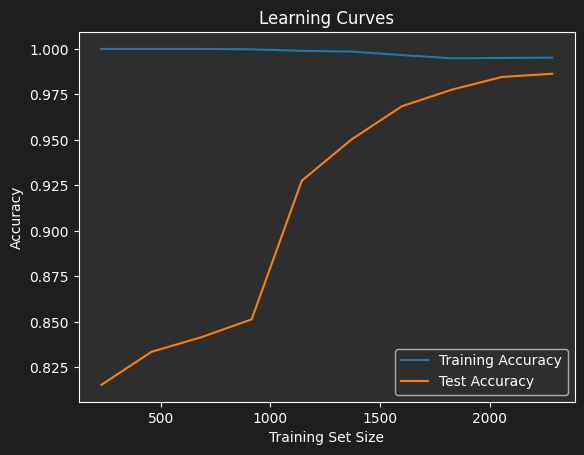

In [223]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt


train_sizes, train_scores, test_scores = learning_curve(
    best_rf_model, X_train_1, y_train_1, cv=5, n_jobs=-1,
    train_sizes=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
)

train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

plt.plot(train_sizes, train_mean, label='Training Accuracy')
plt.plot(train_sizes, test_mean, label='Test Accuracy')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.title('Learning Curves')
plt.show()


In [224]:
# Compare actual and predicted labels
misclassified = X_test[y_test != y_pred]

# View the misclassified data
print("Misclassified Samples:")
print(misclassified)

Misclassified Samples:
      Runtime (Minutes)  Rating  Votes_Binned  Revenue_Binned  Metascore
1710              116.0     7.8             0               0       79.0
1711              116.0     7.8             0               0       79.0
426               134.0     7.4             0               1       65.0
438               105.0     7.0             0               1       67.0
427               134.0     7.4             0               1       65.0
1493              140.0     7.0             0               0       70.0
1491              140.0     7.0             0               0       70.0
105               122.0     7.1             0               1       68.0


In [225]:
import pandas as pd

# Get feature importances
feature_importances = best_rf_model.feature_importances_

# Create a dataframe to view importance values
features_df = pd.DataFrame({
    'Feature': X_train_1.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print("Feature Importances:")
print(features_df)


Feature Importances:
             Feature  Importance
3     Revenue_Binned    0.342860
1             Rating    0.314791
2       Votes_Binned    0.135748
4          Metascore    0.122505
0  Runtime (Minutes)    0.084096


# Ensembling

In [226]:
from sklearn.ensemble import VotingClassifier

# Define individual models
rf_model = RandomForestClassifier(max_depth= 5, min_samples_split= 2, n_estimators= 50)
log_reg_model = LogisticRegression(random_state=42, solver='liblinear', max_iter=500)


# Create an ensemble of the models
voting_model = VotingClassifier(estimators=[
    ('rf', rf_model), 
    ('log_reg', log_reg_model), 
], voting='hard')

# Train the ensemble model
voting_model.fit(X_train_1, y_train_1)

# Make predictions
y_pred_voting = voting_model.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred_voting):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_voting))


Accuracy: 0.9522
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       351
           1       0.85      0.92      0.89        88

    accuracy                           0.95       439
   macro avg       0.92      0.94      0.93       439
weighted avg       0.95      0.95      0.95       439



Evaluation for Random Forest:
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       351
           1       0.95      0.95      0.95        88

    accuracy                           0.98       439
   macro avg       0.97      0.97      0.97       439
weighted avg       0.98      0.98      0.98       439

AUC-ROC: 0.9992


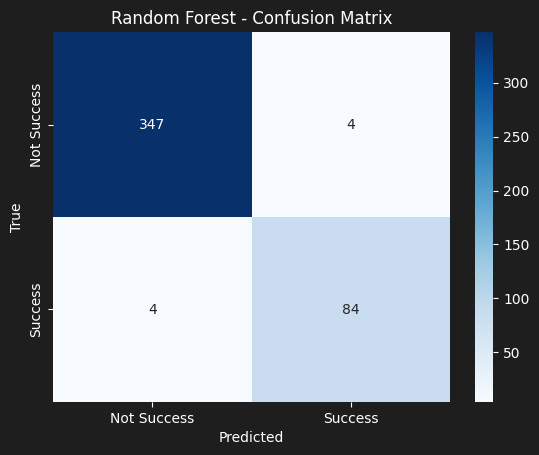

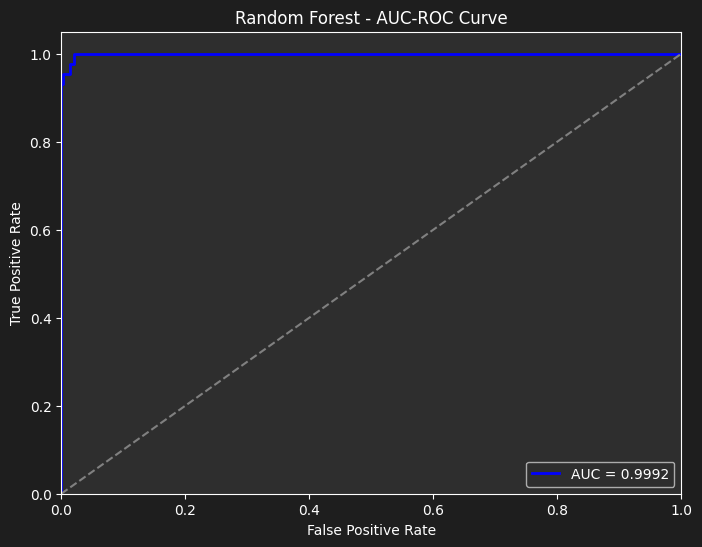

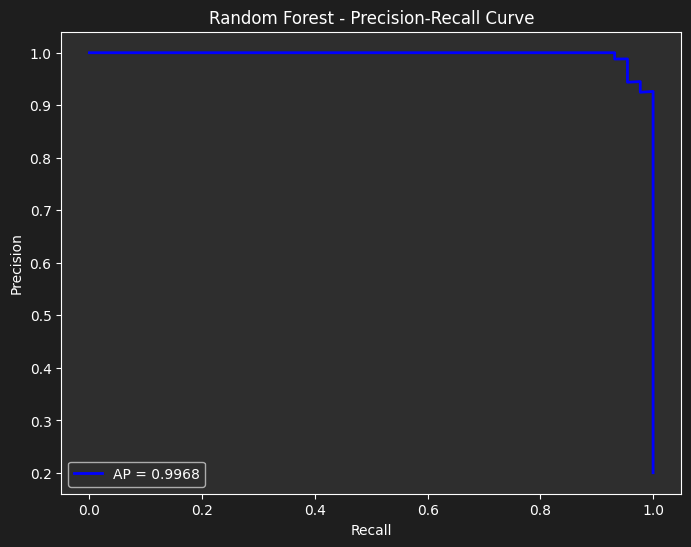

In [227]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, roc_curve, auc, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Define Random Forest model
rf_model = RandomForestClassifier(max_depth=10, min_samples_split=2, n_estimators=50, random_state=42)

# Fit Random Forest model
rf_model.fit(X_train_1, y_train_1)
y_pred_rf = rf_model.predict(X_test)
y_pred_rf_prob = rf_model.predict_proba(X_test)[:, 1]

# Save the Random Forest model to a file
joblib.dump(rf_model, "random_forest_model.pkl")

# Function to plot metrics for Random Forest model
def plot_rf_metrics(model_name, y_true, y_pred, y_pred_prob):
    print(f"Evaluation for {model_name}:")

    # Classification Report
    print("Classification Report:")
    print(classification_report(y_true, y_pred))

    # AUC-ROC
    roc_auc = roc_auc_score(y_true, y_pred_prob)
    print(f"AUC-ROC: {roc_auc:.4f}")

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_true, y_pred)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Not Success", "Success"], yticklabels=["Not Success", "Success"])
    plt.title(f'{model_name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    # AUC-ROC Curve
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob)
    roc_auc_value = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {roc_auc_value:.4f}')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for random model
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} - AUC-ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

    # Precision-Recall Curve
    precision, recall, thresholds = precision_recall_curve(y_true, y_pred_prob)
    average_precision = average_precision_score(y_true, y_pred_prob)

    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, color='blue', lw=2, label=f'AP = {average_precision:.4f}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'{model_name} - Precision-Recall Curve')
    plt.legend(loc="lower left")
    plt.show()

# Evaluate Random Forest model
plot_rf_metrics("Random Forest", y_test, y_pred_rf, y_pred_rf_prob)


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


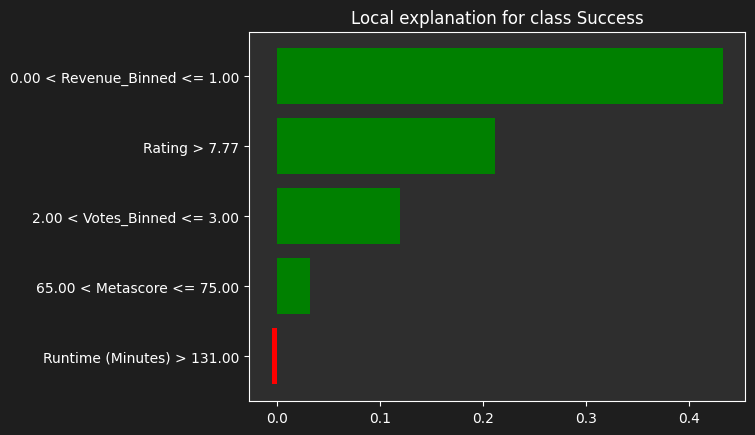

In [228]:
from lime.lime_tabular import LimeTabularExplainer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure y_train is in numpy array format
y_train_np = np.array(y_train_1)

# Set the default Matplotlib styling for dark mode
plt.rcParams.update({
    'axes.facecolor': '#2E2E2E',  # Dark background for axes
    'axes.edgecolor': 'white',    # White border around the axes
    'grid.color': 'gray',         # Gray gridlines for better contrast
    'axes.labelcolor': 'white',   # White labels for axes
    'xtick.color': 'white',       # White ticks on x-axis
    'ytick.color': 'white',       # White ticks on y-axis
    'text.color': 'white',        # White text
    'figure.facecolor': '#1E1E1E' # Dark figure background
})

# Initialize LIME explainer
explainer = LimeTabularExplainer(X_train_1.values, training_labels=y_train_np, mode="classification", 
                                 feature_names=X_train_1.columns, class_names=["Not Success", "Success"], 
                                 discretize_continuous=True)

# Select a sample from the test set and explain
idx = 1
exp = explainer.explain_instance(X_test.iloc[idx].values, best_rf_model.predict_proba, num_features=5)

# Plot the explanation using matplotlib
fig = exp.as_pyplot_figure()

# Customize the figure for dark theme
fig.patch.set_facecolor('#1E1E1E')  # Set figure background to dark
for ax in fig.axes:
    ax.set_facecolor('#2E2E2E')  # Set axes background to dark
    for label in ax.get_xticklabels():
        label.set_color('white')  # Set x-axis labels to white
    for label in ax.get_yticklabels():
        label.set_color('white')  # Set y-axis labels to white
    ax.spines['top'].set_color('white')  # White border around axes
    ax.spines['right'].set_color('white')
    ax.spines['bottom'].set_color('white')
    ax.spines['left'].set_color('white')

plt.show()


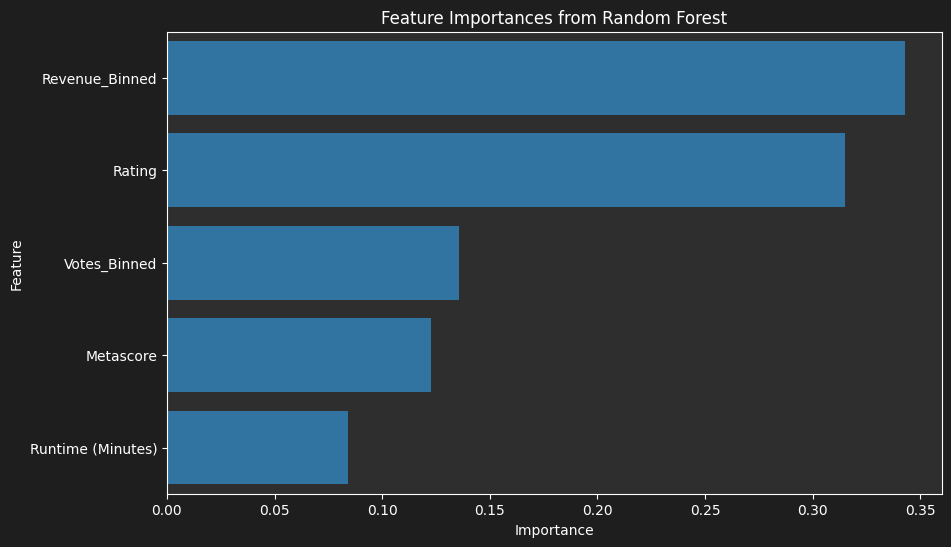

In [229]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract feature importances from the Random Forest model
feature_importances = best_rf_model.feature_importances_

# Create a DataFrame to view feature importances
importance_df = pd.DataFrame({
    'Feature': X_train_1.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plotting the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [230]:
import pickle

# Save the model to a file
with open('model.pkl', 'wb') as file:
    pickle.dump(best_rf_model, file)  # Replace with your trained model

# To load the model later
with open('model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)
# Save X_train1 to a file
with open('X_train_1.pkl', 'wb') as file:
    pickle.dump(X_train_1, file)

# Save y_train1 to a file
with open('y_train_1.pkl', 'wb') as file:
    pickle.dump(y_train_1, file)

In [231]:
import os
print(os.getcwd()) 

/Users/ayyalashriyatha/Desktop
